In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [12]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
# Load the dataset
path = "diabetes_prediction_dataset.csv"
df = pd.read_csv(path)


In [14]:
len(df)

100000

1. Objective: The aim of this project is to develop a robust model capable of predicting the likelihood of diabetes in patients based on their medical history and demographic information. Such predictions hold significant value for healthcare professionals in identifying individuals at risk of developing diabetes. Additionally, pharmaceutical companies are interested in these predictions to aid in customer profiling and the development of customized treatment plans.

2. Dataset: The dataset utilized in this project is the Diabetes Prediction Dataset, which contains a comprehensive collection of medical and demographic data from patients, along with their diabetes status (positive or negative). It encompasses several crucial features, including age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.

3. Methodology: This project focuses on comparing the accuracy scores of various models to determine the most effective model for predicting diabetes. By utilizing the predictors within the dataset, we will construct and assess multiple models, each employing different algorithms or techniques. The performance of these models will be evaluated based on their accuracy in predicting diabetes.

4. Significance: Accurately predicting diabetes holds significant implications for both healthcare professionals and pharmaceutical companies. For healthcare professionals, these predictions can aid in the early identification of individuals at risk of diabetes, enabling the implementation of preventive measures and personalized treatment plans. Pharmaceutical companies can utilize such predictions for customer profiling, facilitating targeted marketing efforts and customized interventions.

To access the complete dataset, please visit the following page: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

This section involves performing exploratory data analysis to gain insights into the dataset. Through data visualization and statistical summaries, we explore the distributions, relationships, and characteristics of the variables. EDA helps us understand the data better and identify any patterns or trends that may exist.

# Removing Duplicates

In [15]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)
df = df.drop_duplicates()


number of duplicate rows:  (3854, 9)


In [16]:
len(df)

96146

In [17]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

# Handeling misssing values

In [18]:
# Check if there are any remaining missing values
print(df.isnull().sum())


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


There are no missing data

💡 Insights:
After examining the default data types, we made necessary adjustments to ensure that predictors such as age and blood_glucose_level are accurately represented. These adjustments were made to facilitate proper analysis and interpretation of these important variables.
Additionally, we conducted a preliminary check for null values in the dataset. Identifying and addressing null values is crucial for maintaining data integrity and reliability. By assessing the presence of missing values, we can take appropriate measures to handle them effectively during the data cleaning process.

# Encoding Categorical Variables(Change non_numerical variables to numerical)

In [19]:

# Map categories to numerical values
smoking_history_mapping = {
    'No Info': 0,
    'never': 1,
    'former': 2,
    'current': 3,
    'not current': 4,
    'ever': 5
}

# Replace categories with numerical values
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)

# Verify the changes
df['smoking_history'].value_counts()


smoking_history
1    34398
0    32887
2     9299
3     9197
4     6367
5     3998
Name: count, dtype: int64

smoking_history
1    34398
0    32887
2     9299
3     9197
4     6367
5     3998
Name: count, dtype: int64


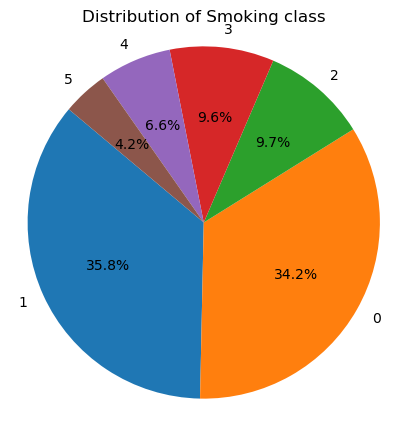

In [20]:

# Calculate the frequency of each category
smoking_count = df['smoking_history'].value_counts()
print(smoking_count)

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(smoking_count, labels=smoking_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Smoking class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [21]:
from sklearn.impute import SimpleImputer
mode_value = df['smoking_history'].mode()[0]
mode_value

# Replace 0 values (representing 'No Info') with mode value
df['smoking_history'] = df['smoking_history'].replace(0, mode_value)

# Verify the changes
print(df['smoking_history'].value_counts())

smoking_history
1    67285
2     9299
3     9197
4     6367
5     3998
Name: count, dtype: int64


Data Visualization

💡 Exploration through Data Visualization:
Within this segment, we employ data visualization methods to delve into the Diabetes Prediction Dataset. Utilizing plots, charts, and graphs, we strive to unveil patterns, connections, and trends embedded in the data. These visual representations serve to enrich our comprehension of the dataset, facilitating the communication of discoveries and crucial insights to stakeholders and decision-makers. By crafting informative visualizations, we illuminate significant patterns and correlations, empowering more informed decision-making and actionable insights.

/Users/mahdi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


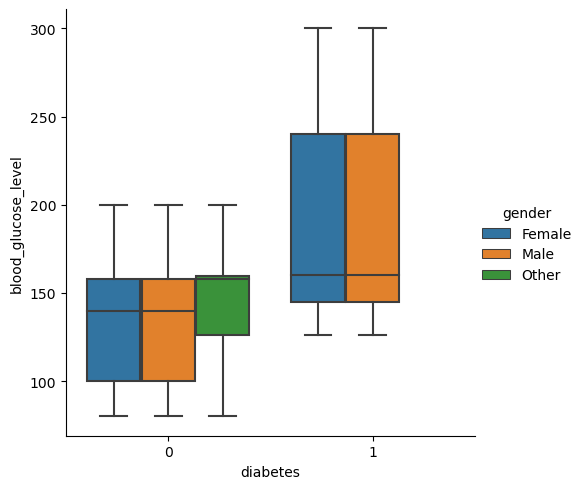

In [22]:
sns.catplot(data = df, x = 'diabetes', y = 'blood_glucose_level', kind = 'box', hue = 'gender')
plt.show()

💡 Initial observations of the Box Plot for Diabetes vs. Blood Glucose Level show consistency across genders, with a notable difference in the "Other" category. This discrepancy is likely due to the limited sample size, comprising only 18 entries in the dataset.
Considering this constraint, caution is advised in interpreting the Box Plot, accounting for potential bias from the small sample size.

/Users/mahdi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


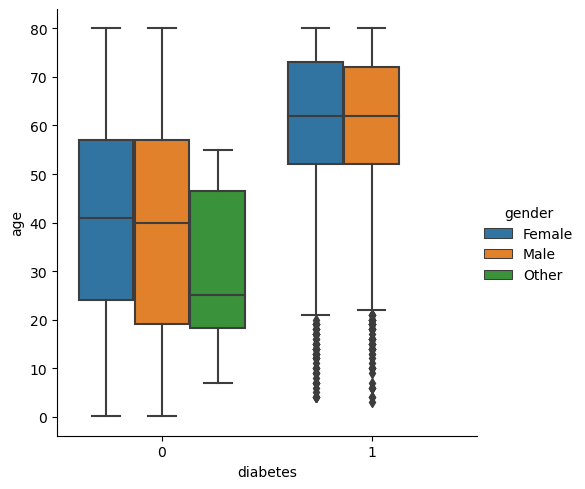

In [23]:
sns.catplot(data = df, x = 'diabetes', y = 'age', kind = 'box', hue = 'gender')
plt.show()

💡 Insights:
The Box Plot shows that individuals with diabetes generally have a higher median age than those without. This suggests a strong association between age and diabetes prevalence, with older individuals being more susceptible. Occasional outliers below age 20 hint at early-onset diabetes cases. Understanding this relationship aids in targeting interventions for different age groups.

/Users/mahdi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


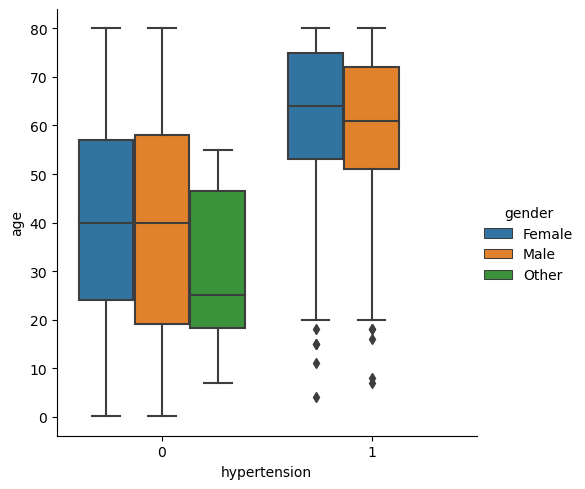

In [24]:
sns.catplot(data = df, x = 'hypertension', y = 'age', kind = 'box', hue = 'gender')
plt.show()

💡 Insights:
The Box Plot for Hypertension vs. Age, categorized by gender, shows a similarity to the previously observed Diabetes vs. Age plot. This similarity was expected, as there is a natural correlation between age and the likelihood of developing both diabetes and hypertension. Age can be considered a confounding factor in this context.
The resemblance in the boxplots reinforces the notion that as age increases, the likelihood of developing hypertension also tends to increase. This aligns with the general understanding that age is a significant risk factor for hypertension.

/Users/mahdi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/mahdi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


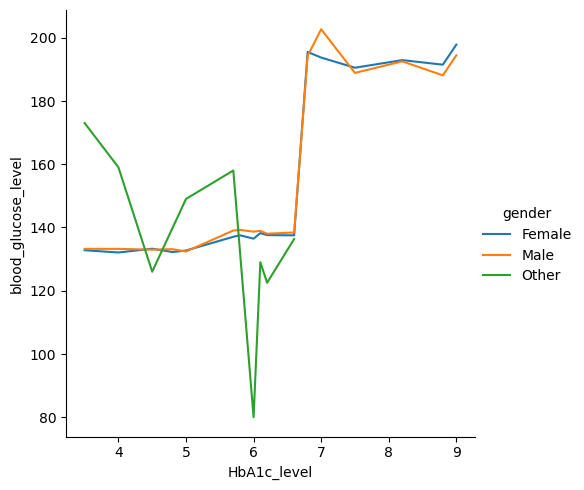

In [25]:
sns.relplot(data = df, x = 'HbA1c_level', y =  'blood_glucose_level', kind = 'line', hue = 'gender', ci = None, markers = True)
plt.show()

💡 Comparing HbA1c and blood glucose levels between male and female genders reveals similar distributions. Both genders exhibit comparable patterns and value ranges. However, the "Other" gender category presents a distinct distribution shape, likely due to its limited sample size of only 18 entries.
Given the small sample size for the "Other" gender category, caution is warranted in interpretation and conclusion drawing. Limited observations may result in a skewed representation of the population. Hence, analyzing this category requires careful consideration of potential biases introduced by the sparse data.







In [26]:
df = df[df.gender != 'Other']

In [27]:
# Encode 'gender' column
gender_encoder = LabelEncoder()
df['gender_encoded'] = gender_encoder.fit_transform(df['gender'])

# Now you can drop the original categorical columns if you want
df.drop(['gender'], axis=1, inplace=True)

# Check the encoded DataFrame
df.head(20)

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded
0,80.0,0,1,1,25.19,6.6,140,0,0
1,54.0,0,0,1,27.32,6.6,80,0,0
2,28.0,0,0,1,27.32,5.7,158,0,1
3,36.0,0,0,3,23.45,5.0,155,0,0
4,76.0,1,1,3,20.14,4.8,155,0,1
5,20.0,0,0,1,27.32,6.6,85,0,0
6,44.0,0,0,1,19.31,6.5,200,1,0
7,79.0,0,0,1,23.86,5.7,85,0,0
8,42.0,0,0,1,33.64,4.8,145,0,1
9,32.0,0,0,1,27.32,5.0,100,0,0


Data preparation
Data separation as x and y

In [28]:
y = df['diabetes']
y
# y.value_counts()

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96128, dtype: int64

In [29]:
X =df.drop('diabetes',axis=1)
X

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,gender_encoded
0,80.0,0,1,1,25.19,6.6,140,0
1,54.0,0,0,1,27.32,6.6,80,0
2,28.0,0,0,1,27.32,5.7,158,1
3,36.0,0,0,3,23.45,5.0,155,0
4,76.0,1,1,3,20.14,4.8,155,1
...,...,...,...,...,...,...,...,...
99994,36.0,0,0,1,24.60,4.8,145,0
99996,2.0,0,0,1,17.37,6.5,100,0
99997,66.0,0,0,2,27.83,5.7,155,1
99998,24.0,0,0,1,35.42,4.0,100,0


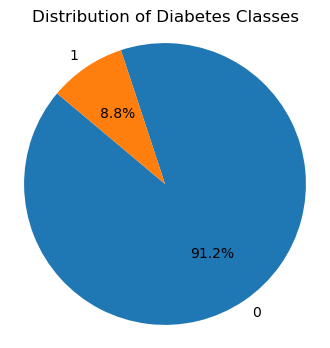

In [30]:
df['diabetes'].value_counts()
import matplotlib.pyplot as plt

# Assuming df['diabetes'] is a pandas Series
diabetes_counts = df['diabetes'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diabetes Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Balancing the dataset

In [31]:
from imblearn.over_sampling import SMOTE
#Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

In [32]:
# Function to apply SMOTE and RandomUnderSampler
def resampling(X_train, y_train):
    # Smote
    smote = SMOTE(sampling_strategy=0.1)  # Adjust sampling strategy as needed
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Apply RandomUnderSampler 
    under_sample = RandomUnderSampler(sampling_strategy=0.5)  
    X_train_resampled, y_train_resampled = under_sample.fit_resample(X_train_resampled, y_train_resampled)

    return X_train_resampled, y_train_resampled

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_resampled, y_train_resampled = resampling(X_train, y_train)

# Split the training data into training and validation sets (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

In [34]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (16828, 8) (16828,)
Validation set shape: (4208, 8) (4208,)
Testing set shape: (19226, 8) (19226,)


In [35]:
X_valid.shape

(4208, 8)

In [36]:
y_valid.shape

(4208,)

# Normalise the dataset

In [37]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler on the balanced training set and transform the features
X_train = scaler.fit_transform(X_train)

# Apply the same scaler to the validation and testing sets
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Print the shapes of the normalized datasets
print("Normalized training set shape:", X_train.shape)
print("Normalized validation set shape:", X_valid.shape)
print("Normalized testing set shape:", X_test.shape)

Normalized training set shape: (16828, 8)
Normalized validation set shape: (4208, 8)
Normalized testing set shape: (19226, 8)


# creating a neural network

In [38]:
import tensorflow as tf

# Model 0

In [39]:
model0 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(8, )),
  tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer = 'uniform')
])

model0.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

log = model0.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
526/526 [==============================] - 1s 1ms/step - loss: 0.6467 - accuracy: 0.6711 - val_loss: 0.6196 - val_accuracy: 0.6697
Epoch 2/50
526/526 [==============================] - 0s 795us/step - loss: 0.6007 - accuracy: 0.6805 - val_loss: 0.5828 - val_accuracy: 0.6956
Epoch 3/50
526/526 [==============================] - 0s 816us/step - loss: 0.5668 - accuracy: 0.7203 - val_loss: 0.5526 - val_accuracy: 0.7386
Epoch 4/50
526/526 [==============================] - 0s 928us/step - loss: 0.5385 - accuracy: 0.7540 - val_loss: 0.5272 - val_accuracy: 0.7728
Epoch 5/50
526/526 [==============================] - 1s 1ms/step - loss: 0.5146 - accuracy: 0.7836 - val_loss: 0.5056 - val_accuracy: 0.7861
Epoch 6/50
526/526 [==============================] - 1s 1ms/step - loss: 0.4942 - accuracy: 0.7998 - val_loss: 0.4871 - val_accuracy: 0.8113
Epoch 7/50
526/526 [==============================] - 1s 1ms/step - loss: 0.4765 - accuracy: 0.8164 - val_loss: 0.4710 - val_accuracy: 0.8246


We change the activation function and the optimizer to see if the accuracy increases.


In [40]:
# Evaluate the model
loss, accuracy = model0.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

601/601 [==============================] - 0s 621us/step - loss: 0.2367 - accuracy: 0.9322
Test Accuracy: 0.9322271943092346


In [41]:
# model0.save("my_tf_regression_model.keras")
# saved_model0 = tf.keras.models.load_model("my_tf_regression_model.keras")
# X_new = X_test[:1]

# y_predict_original = model0.predict(X_new)
# y_predict_saved = saved_model0.predict(X_new)
# print("Predicted probabilities with original model: " + str(y_predict_original))
# print("Predicted probabilities with saved model: " + str(y_predict_saved))

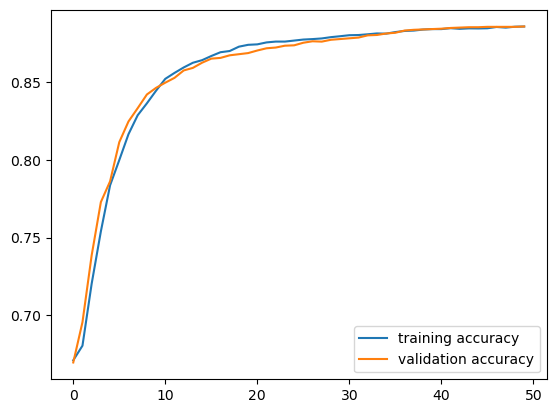

In [42]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "validation accuracy")
plt.legend()
plt.show()

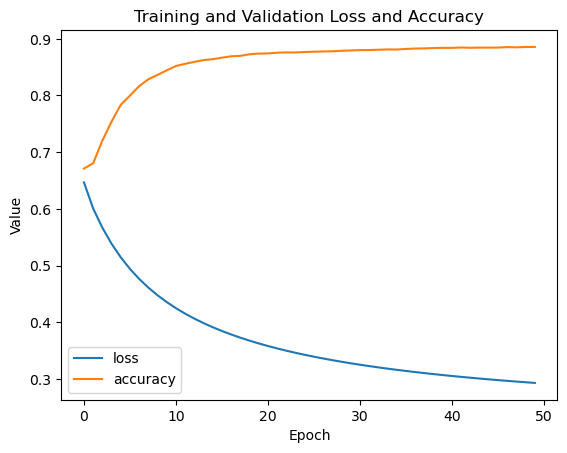

In [43]:
# Plot loss and accuracy graph
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Loss and Accuracy')
plt.legend()
plt.show()

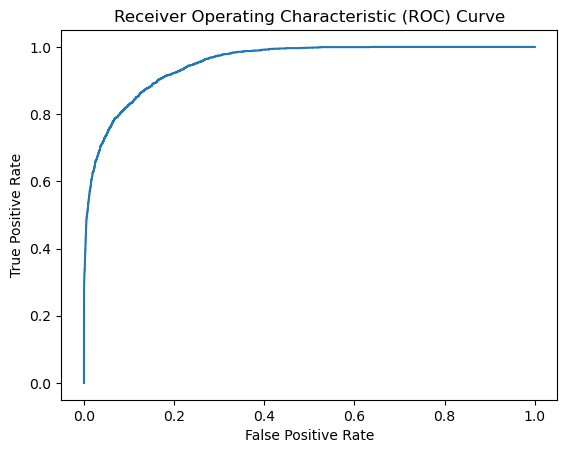

AUC Score: 0.9518554244754911


In [44]:
predictions = model0(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_test, predictions))

In [45]:
y_pred_prob = model0.predict(X_test)

# Convert predicted probabilities to binary values (0 or 1) using a threshold
threshold = 0.5
y_pred_binary = (y_pred_prob > threshold).astype("int32").reshape(-1)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred_binary)

print("Classification Report:")
print(report)

601/601 [==============================] - 0s 426us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17525
           1       0.59      0.74      0.66      1701

    accuracy                           0.93     19226
   macro avg       0.78      0.84      0.81     19226
weighted avg       0.94      0.93      0.94     19226



601/601 [==============================] - 0s 402us/step


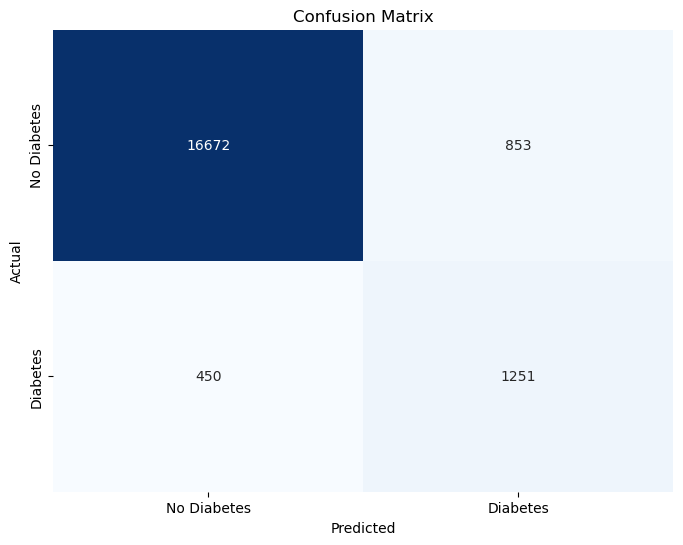

In [46]:
#Confusion Matrix
y_pred = model0.predict(X_test)
y_pred_bool = np.round(y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_bool)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion_matrix(cm)

# Model 1

In [125]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(8, )),
  tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer = 'uniform'),
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

log = model1.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
526/526 [==============================] - 1s 1ms/step - loss: 0.6505 - accuracy: 0.6817 - val_loss: 0.6190 - val_accuracy: 0.7096
Epoch 2/100
526/526 [==============================] - 0s 650us/step - loss: 0.5941 - accuracy: 0.7350 - val_loss: 0.5734 - val_accuracy: 0.7450
Epoch 3/100
526/526 [==============================] - 0s 783us/step - loss: 0.5524 - accuracy: 0.7670 - val_loss: 0.5373 - val_accuracy: 0.7771
Epoch 4/100
526/526 [==============================] - 1s 990us/step - loss: 0.5189 - accuracy: 0.7874 - val_loss: 0.5076 - val_accuracy: 0.7997
Epoch 5/100
526/526 [==============================] - 0s 752us/step - loss: 0.4909 - accuracy: 0.8084 - val_loss: 0.4824 - val_accuracy: 0.8177
Epoch 6/100
526/526 [==============================] - 0s 706us/step - loss: 0.4670 - accuracy: 0.8239 - val_loss: 0.4604 - val_accuracy: 0.8279
Epoch 7/100
526/526 [==============================] - 0s 694us/step - loss: 0.4461 - accuracy: 0.8364 - val_loss: 0.4413 - val_accu

In [126]:
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

601/601 [==============================] - 0s 738us/step - loss: 0.1856 - accuracy: 0.9283
Test Accuracy: 0.9283262491226196


In [127]:
# model1.save("my_tf_regression_model.keras")
# saved_model1 = tf.keras.models.load_model("my_tf_regression_model.keras")
# X_new = X_test[:1]

# y_predict_original = model1.predict(X_new)
# y_predict_saved = saved_model1.predict(X_new)
# print("Predicted probabilities with original model: " + str(y_predict_original))
# print("Predicted probabilities with saved model: " + str(y_predict_saved))

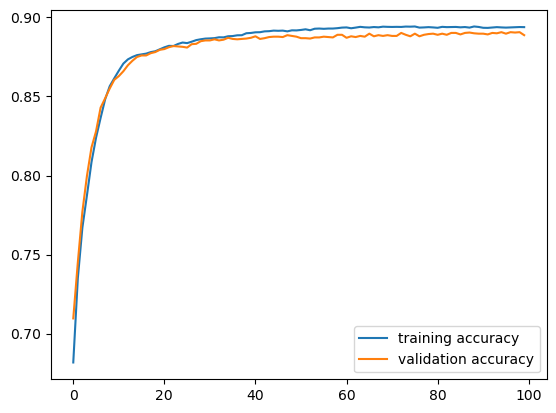

In [128]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "validation accuracy")
plt.legend()
plt.show()

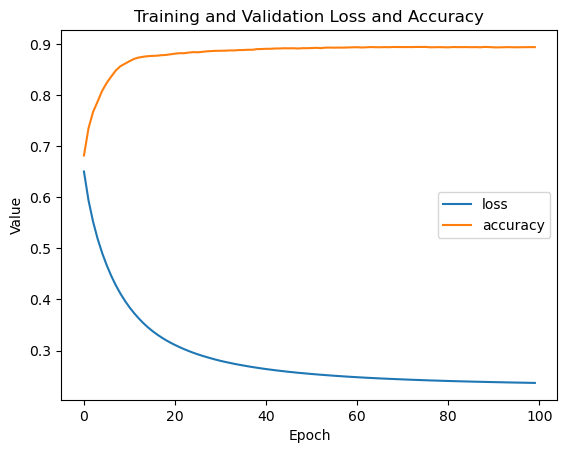

In [129]:
# Plot loss and accuracy graph
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Loss and Accuracy')
plt.legend()
plt.show()

601/601 [==============================] - 0s 636us/step


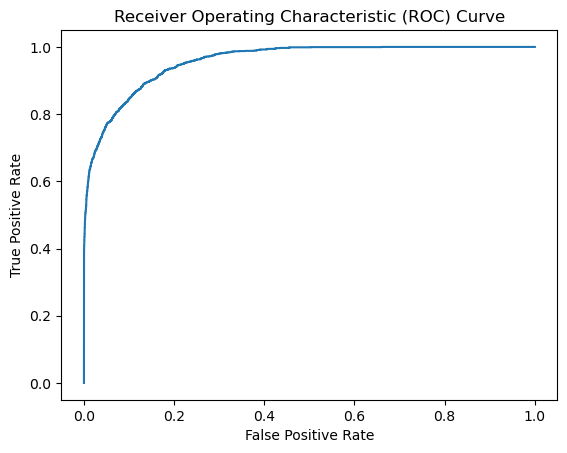

AUC Score: 0.9580182505717458


In [130]:
# Plot ROC curve
predictions = model1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_test, predictions))

In [131]:
y_pred_prob = model1.predict(X_test)

# Convert predicted probabilities to binary values (0 or 1) using a threshold
threshold = 0.5
y_pred_binary = (y_pred_prob > threshold).astype("int32").reshape(-1)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred_binary)

print("Classification Report:")
print(report)

601/601 [==============================] - 0s 584us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     17525
           1       0.57      0.78      0.66      1701

    accuracy                           0.93     19226
   macro avg       0.77      0.86      0.81     19226
weighted avg       0.94      0.93      0.93     19226



601/601 [==============================] - 0s 745us/step


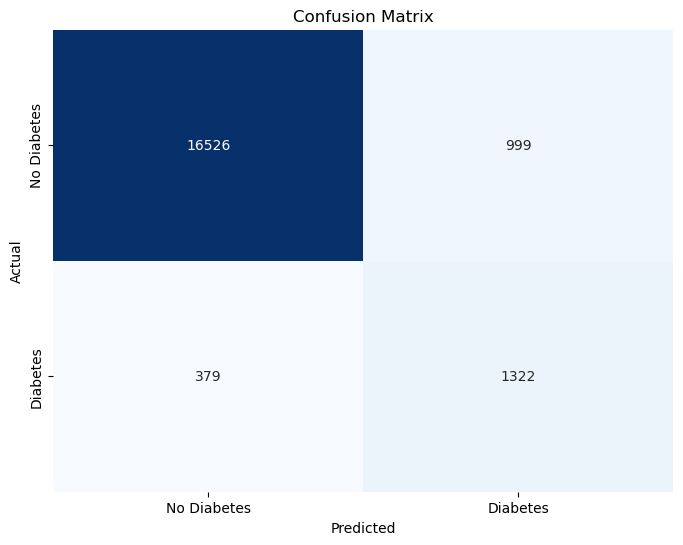

In [132]:
#Confusion Matrix
y_pred = model1.predict(X_test)
y_pred_bool = np.round(y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_bool)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, fmt='d',annot=True, cmap='Blues', cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion_matrix(cm)

# Model 2

In [55]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Input(shape=(8,)))
model2.add(tf.keras.layers.Dense(32, activation="relu", kernel_initializer='uniform'))
model2.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='uniform'))

In [56]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                288       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
hidden_layer = model2.layers[0]

In [58]:
weights, bias = hidden_layer.get_weights()
print(weights)
print('----')
print(weights.shape)
print('----')
print(bias)
print('----')
print(bias.shape)

[[ 0.03666636  0.0331213   0.0118813   0.04512541 -0.03195876  0.04360448
  -0.03971023 -0.03783869 -0.00782447  0.00319015  0.04821458  0.04302411
  -0.03454431 -0.00204098  0.01771165  0.01248455  0.038153   -0.00341557
   0.04912622  0.03555051 -0.02708918  0.04173717 -0.0075124  -0.02217045
  -0.00561748  0.03016033  0.01984331 -0.04460373  0.02339326 -0.02550434
  -0.02083212 -0.04389088]
 [ 0.04042761  0.03460645  0.00823258  0.0342577   0.02054076  0.03577403
   0.02079404 -0.0314027   0.01092856 -0.03942148 -0.0479113   0.01539382
  -0.0372069  -0.01264469  0.02746597  0.02109282  0.02647067 -0.03701637
  -0.01181976  0.03855295  0.03278495 -0.02974073  0.02430401  0.02167803
  -0.00279292 -0.04284734  0.01030071 -0.01308579  0.01493572 -0.00409558
  -0.04374168  0.00779349]
 [-0.04990045  0.01996661  0.01038221  0.04408086 -0.04458432  0.04443501
  -0.04874021 -0.03022565 -0.00911419 -0.01282544 -0.02458498 -0.04032753
   0.01272981 -0.04658007 -0.01219276 -0.0437476   0.02514

In [59]:
model2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.experimental.SGD(learning_rate=0.01),
              metrics=["accuracy"])

In [60]:
log = model2.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
526/526 [==============================] - 1s 802us/step - loss: 0.6569 - accuracy: 0.6657 - val_loss: 0.6396 - val_accuracy: 0.6683
Epoch 2/30
526/526 [==============================] - 1s 1000us/step - loss: 0.6367 - accuracy: 0.6663 - val_loss: 0.6324 - val_accuracy: 0.6683
Epoch 3/30
526/526 [==============================] - 0s 663us/step - loss: 0.6298 - accuracy: 0.6663 - val_loss: 0.6236 - val_accuracy: 0.6683
Epoch 4/30
526/526 [==============================] - 1s 1ms/step - loss: 0.6155 - accuracy: 0.6663 - val_loss: 0.6025 - val_accuracy: 0.6683
Epoch 5/30
526/526 [==============================] - 0s 815us/step - loss: 0.5841 - accuracy: 0.6716 - val_loss: 0.5614 - val_accuracy: 0.6996
Epoch 6/30
526/526 [==============================] - 0s 901us/step - loss: 0.5325 - accuracy: 0.7489 - val_loss: 0.5036 - val_accuracy: 0.8037
Epoch 7/30
526/526 [==============================] - 0s 724us/step - loss: 0.4709 - accuracy: 0.8293 - val_loss: 0.4440 - val_accuracy: 

In [61]:
# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

601/601 [==============================] - 0s 579us/step - loss: 0.1790 - accuracy: 0.9277
Test Accuracy: 0.9276500344276428


In [62]:
# model2.save("my_tf_regression_model.keras")
# saved_model2 = tf.keras.models.load_model("my_tf_regression_model.keras")
# X_new = X_test[:1]

# y_predict_original = model2.predict(X_new)
# y_predict_saved = saved_model2.predict(X_new)
# print("Predicted probabilities with original model: " + str(y_predict_original))
# print("Predicted probabilities with saved model: " + str(y_predict_saved))

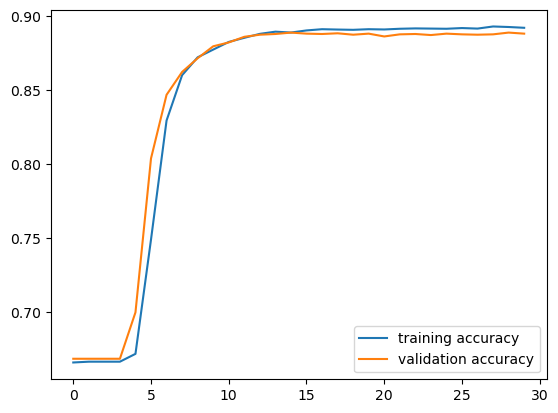

In [63]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "validation accuracy")
plt.legend()
plt.show()

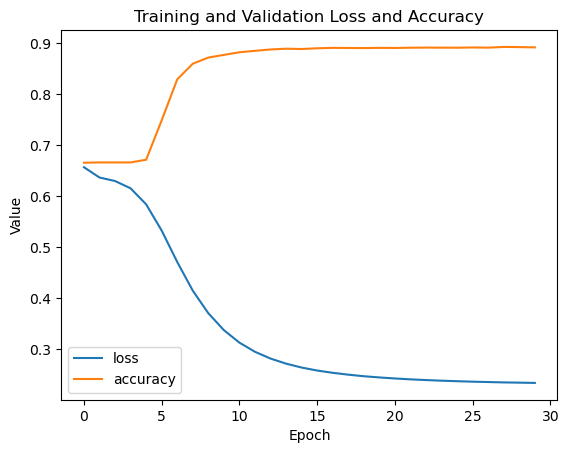

In [64]:
# Plot loss and accuracy graph
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Loss and Accuracy')
plt.legend()
plt.show()


In [65]:
# Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

601/601 [==============================] - 0s 725us/step - loss: 0.1790 - accuracy: 0.9277
Test loss: 0.17904338240623474
Test accuracy: 0.9276500344276428


601/601 [==============================] - 1s 838us/step


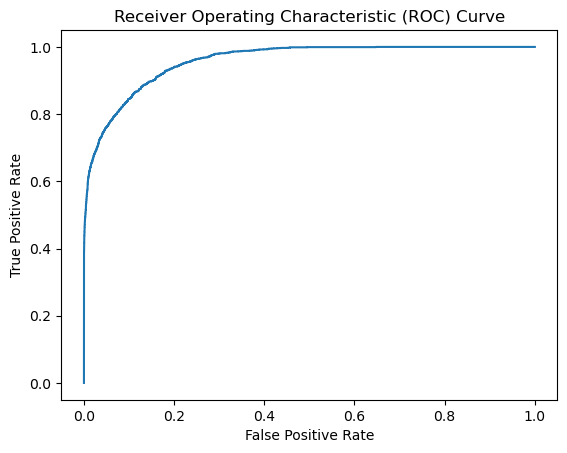

AUC Score: 0.9578480058302534


In [66]:
# Plot ROC curve
predictions = model2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_test, predictions))

In [67]:
# Predict probabilities for the test set
y_pred_prob = model2.predict(X_test)

# Convert predicted probabilities to binary values (0 or 1) using a threshold
threshold = 0.5
y_pred_binary = (y_pred_prob > threshold).astype("int32").reshape(-1)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred_binary)

print("Classification Report:")
print(report)

601/601 [==============================] - 0s 723us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     17525
           1       0.57      0.78      0.66      1701

    accuracy                           0.93     19226
   macro avg       0.77      0.86      0.81     19226
weighted avg       0.94      0.93      0.93     19226



  1/601 [..............................] - ETA: 10s601/601 [==============================] - 0s 528us/step


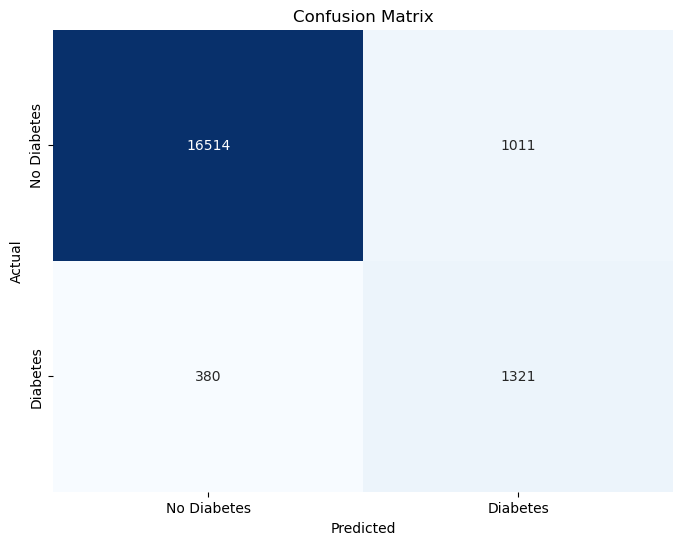

In [123]:
#Confusion Matrix
y_pred = model2.predict(X_test)
y_pred_bool = np.round(y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_bool)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion_matrix(cm)

# Model 3

We now increase the number of layers in Adams optimizer.

In [69]:
# Define and compile the model
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Input(shape=(8,)))
model3.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer='uniform'))
model3.add(tf.keras.layers.Dense(50, activation="relu", kernel_initializer='uniform'))
model3.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='uniform'))

model3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])
# Train the model
log = model3.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
526/526 [==============================] - 1s 1ms/step - loss: 0.2781 - accuracy: 0.8759 - val_loss: 0.2616 - val_accuracy: 0.8752
Epoch 2/30
526/526 [==============================] - 0s 930us/step - loss: 0.2452 - accuracy: 0.8868 - val_loss: 0.2656 - val_accuracy: 0.8726
Epoch 3/30
526/526 [==============================] - 1s 948us/step - loss: 0.2381 - accuracy: 0.8902 - val_loss: 0.2272 - val_accuracy: 0.8926
Epoch 4/30
526/526 [==============================] - 1s 1ms/step - loss: 0.2345 - accuracy: 0.8895 - val_loss: 0.2245 - val_accuracy: 0.8916
Epoch 5/30
526/526 [==============================] - 1s 983us/step - loss: 0.2150 - accuracy: 0.8947 - val_loss: 0.1978 - val_accuracy: 0.9016
Epoch 6/30
526/526 [==============================] - 0s 886us/step - loss: 0.2025 - accuracy: 0.8989 - val_loss: 0.2003 - val_accuracy: 0.8971
Epoch 7/30
526/526 [==============================] - 0s 889us/step - loss: 0.2022 - accuracy: 0.8994 - val_loss: 0.2012 - val_accuracy: 0.9

In [70]:
# Evaluate the model on the test set
test_loss, test_acc = model3.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

601/601 [==============================] - 1s 849us/step - loss: 0.1748 - accuracy: 0.9373
Test loss: 0.17475156486034393
Test accuracy: 0.9372724294662476


In [71]:
# model3.save("my_tf_regression_model.keras")
# saved_model3 = tf.keras.models.load_model("my_tf_regression_model.keras")
# X_new = X_test[:1]

# y_predict_original = model3.predict(X_new)
# y_predict_saved = saved_model3.predict(X_new)
# print("Predicted probabilities with original model: " + str(y_predict_original))
# print("Predicted probabilities with saved model: " + str(y_predict_saved))

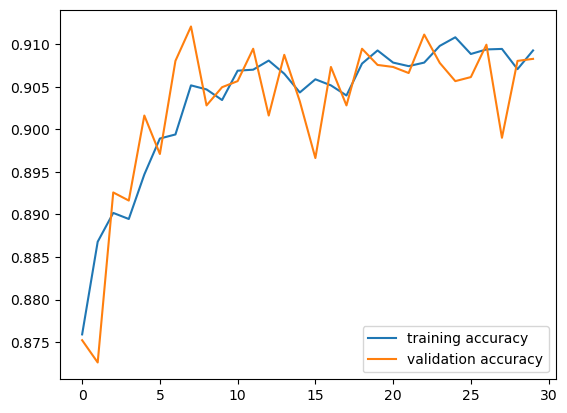

In [72]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "validation accuracy")
plt.legend()
plt.show()

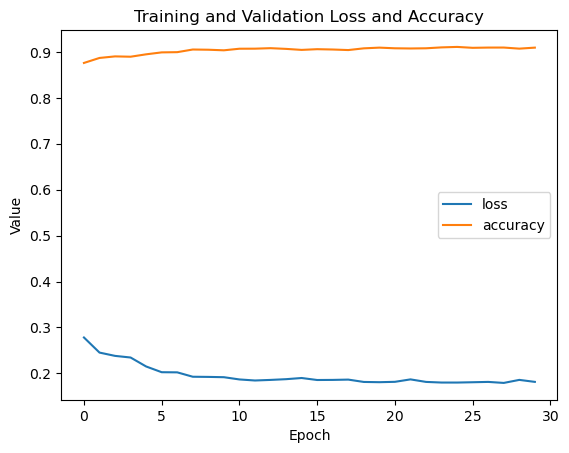

In [73]:
# Plot loss and accuracy graph
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Loss and Accuracy')
plt.legend()
plt.show()

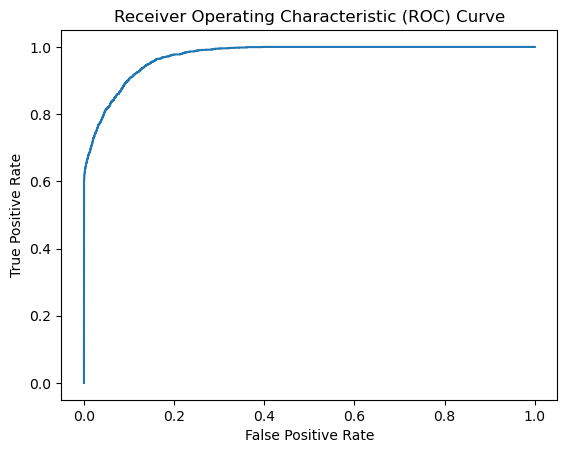

AUC Score: 0.9730773791702624


In [74]:
predictions = model3(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_test, predictions))

In [75]:
# Predict probabilities for the test set
y_pred_prob = model3.predict(X_test)

# Convert predicted probabilities to binary values (0 or 1) using a threshold
threshold = 0.5
y_pred_binary = (y_pred_prob > threshold).astype("int32").reshape(-1)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred_binary)

print("Classification Report:")
print(report)

601/601 [==============================] - 0s 446us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     17525
           1       0.61      0.82      0.70      1701

    accuracy                           0.94     19226
   macro avg       0.79      0.88      0.83     19226
weighted avg       0.95      0.94      0.94     19226



601/601 [==============================] - 0s 488us/step


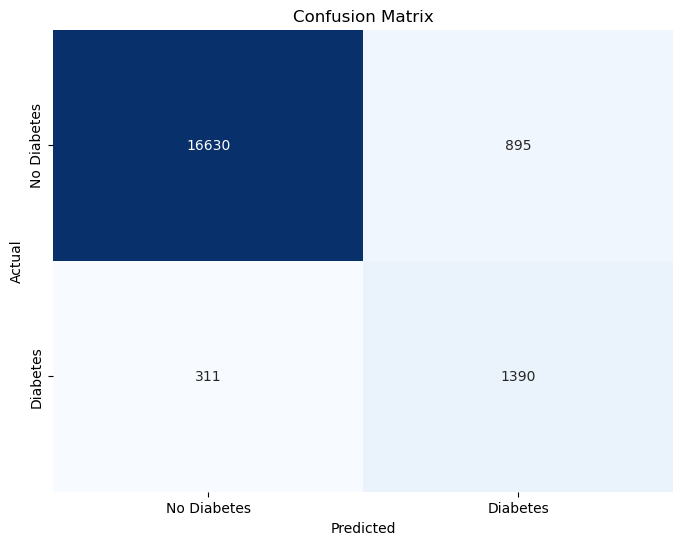

In [76]:
#Confusion Matrix
y_pred = model3.predict(X_test)
y_pred_bool = np.round(y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_bool)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion_matrix(cm)

# Model 4

In this model we increase the number of layers and neurons.

In [77]:
# Define and compile the model
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Input(shape=(8,)))
model4.add(tf.keras.layers.Dense(200, activation="relu", kernel_initializer='uniform'))
model4.add(tf.keras.layers.Dense(100, activation="relu", kernel_initializer='uniform'))
model4.add(tf.keras.layers.Dense(50, activation="relu", kernel_initializer='uniform'))
model4.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='uniform'))

model4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])
# Train the model
log = model4.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
526/526 [==============================] - 1s 1ms/step - loss: 0.3085 - accuracy: 0.8593 - val_loss: 0.2580 - val_accuracy: 0.8807
Epoch 2/100
526/526 [==============================] - 1s 1ms/step - loss: 0.2382 - accuracy: 0.8918 - val_loss: 0.2316 - val_accuracy: 0.8904
Epoch 3/100
526/526 [==============================] - 1s 1ms/step - loss: 0.2392 - accuracy: 0.8904 - val_loss: 0.2619 - val_accuracy: 0.8843
Epoch 4/100
526/526 [==============================] - 1s 1ms/step - loss: 0.2395 - accuracy: 0.8887 - val_loss: 0.2310 - val_accuracy: 0.8914
Epoch 5/100
526/526 [==============================] - 1s 1ms/step - loss: 0.2388 - accuracy: 0.8911 - val_loss: 0.2339 - val_accuracy: 0.8907
Epoch 6/100
526/526 [==============================] - 1s 1ms/step - loss: 0.2360 - accuracy: 0.8917 - val_loss: 0.2308 - val_accuracy: 0.8926
Epoch 7/100
526/526 [==============================] - 1s 1ms/step - loss: 0.2350 - accuracy: 0.8921 - val_loss: 0.2311 - val_accuracy: 0.8931

In [78]:
# Evaluate the model on the test set
test_loss, test_acc = model4.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

601/601 [==============================] - 0s 557us/step - loss: 0.1468 - accuracy: 0.9347
Test loss: 0.14680908620357513
Test accuracy: 0.9347237944602966


In [79]:
# model4.save("my_tf_regression_model.keras")
# saved_model4 = tf.keras.models.load_model("my_tf_regression_model.keras")
# X_new = X_test[:1]

# y_predict_original = model4.predict(X_new)
# y_predict_saved = saved_model4.predict(X_new)
# print("Predicted probabilities with original model: " + str(y_predict_original))
# print("Predicted probabilities with saved model: " + str(y_predict_saved))

In this model, we have added more layers, introduced batch normalization to stabilize the training process, used dropout layers to prevent overfitting, and reduced the learning rate to 0.001 to potentially improve convergence.

Saving the model

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


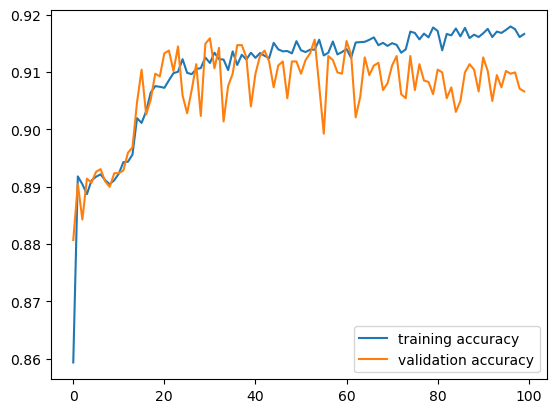

In [81]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "validation accuracy")
plt.legend()
plt.show()

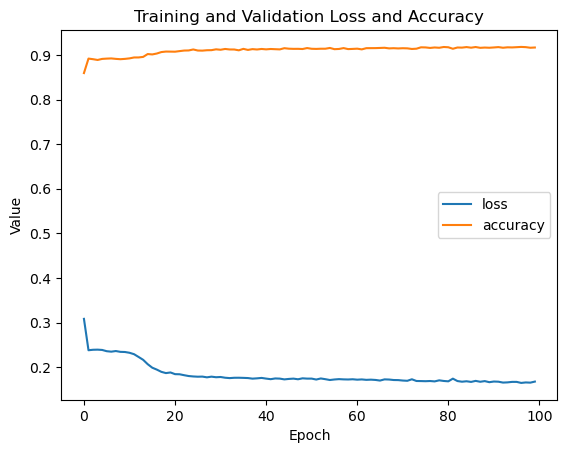

In [82]:
# Plot loss and accuracy graph
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Loss and Accuracy')
plt.legend()
plt.show()

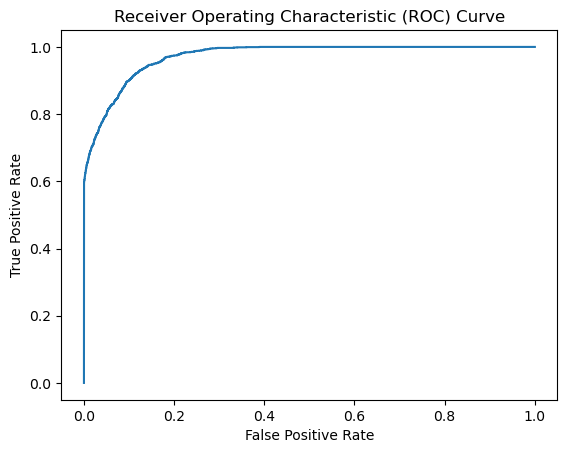

AUC Score: 0.9717834352705171


In [83]:
predictions = model4(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_test, predictions))

In [84]:
# Predict probabilities for the test set
y_pred_prob = model4.predict(X_test)

# Convert predicted probabilities to binary values (0 or 1) using a threshold
threshold = 0.5
y_pred_binary = (y_pred_prob > threshold).astype("int32").reshape(-1)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred_binary)

print("Classification Report:")
print(report)

601/601 [==============================] - 0s 604us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     17525
           1       0.60      0.81      0.69      1701

    accuracy                           0.93     19226
   macro avg       0.79      0.88      0.83     19226
weighted avg       0.95      0.93      0.94     19226



601/601 [==============================] - 0s 607us/step


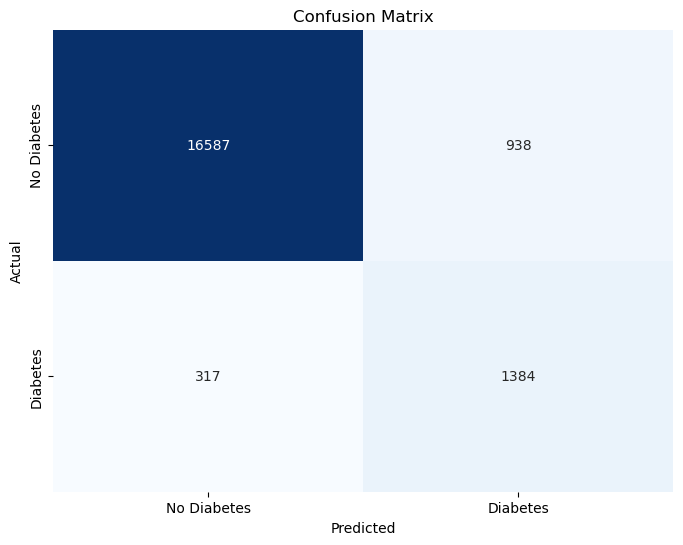

In [85]:
#Confusion Matrix
y_pred = model4.predict(X_test)
y_pred_bool = np.round(y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_bool)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion_matrix(cm)

# Model 5

In [86]:
import tensorflow as tf

# Define the neural network architecture
model5 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Create the optimizer with the desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
log=model5.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_valid, y_valid))

Epoch 1/200
132/132 [==============================] - 1s 4ms/step - loss: 0.4770 - accuracy: 0.7877 - val_loss: 0.4263 - val_accuracy: 0.8679
Epoch 2/200
132/132 [==============================] - 0s 3ms/step - loss: 0.3068 - accuracy: 0.8697 - val_loss: 0.3425 - val_accuracy: 0.8669
Epoch 3/200
132/132 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.8725 - val_loss: 0.2769 - val_accuracy: 0.8895
Epoch 4/200
132/132 [==============================] - 0s 3ms/step - loss: 0.2677 - accuracy: 0.8816 - val_loss: 0.2419 - val_accuracy: 0.8902
Epoch 5/200
132/132 [==============================] - 0s 3ms/step - loss: 0.2650 - accuracy: 0.8831 - val_loss: 0.2389 - val_accuracy: 0.8923
Epoch 6/200
132/132 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.8852 - val_loss: 0.2284 - val_accuracy: 0.8895
Epoch 7/200
132/132 [==============================] - 1s 4ms/step - loss: 0.2559 - accuracy: 0.8836 - val_loss: 0.2261 - val_accuracy: 0.8907

In [87]:
# Evaluate the model on the test set
test_loss, test_acc = model5.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

601/601 [==============================] - 0s 670us/step - loss: 0.1360 - accuracy: 0.9366
Test loss: 0.13602520525455475
Test accuracy: 0.9366483092308044


In [88]:
model5.save("my_tf_regression_model.keras")
saved_model5 = tf.keras.models.load_model("my_tf_regression_model.keras")
X_new = X_test[:1]

y_predict_original = model5.predict(X_new)
y_predict_saved = saved_model5.predict(X_new)
print("Predicted probabilities with original model: " + str(y_predict_original))
print("Predicted probabilities with saved model: " + str(y_predict_saved))



1/1 [==============================] - 0s 50ms/step
Predicted probabilities with original model: [[2.4504585e-05]]
Predicted probabilities with saved model: [[2.4504585e-05]]


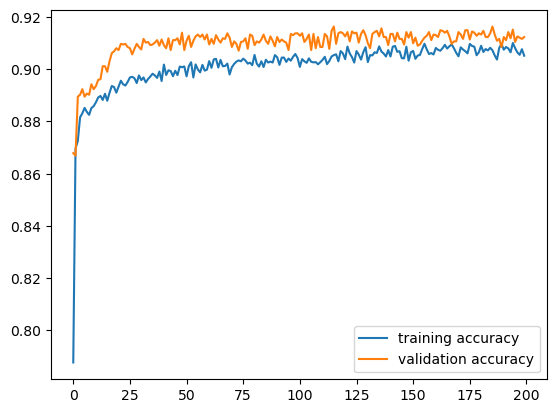

In [89]:
plt.plot(log.history['accuracy'],label = "training accuracy")
plt.plot(log.history['val_accuracy'], label = "validation accuracy")
plt.legend()
plt.show()

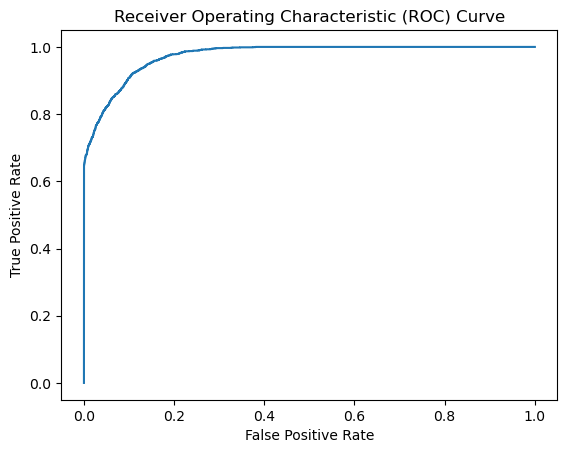

AUC Score: 0.9744843219688679


In [90]:
predictions = model5(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
print("AUC Score:", roc_auc_score(y_test, predictions))

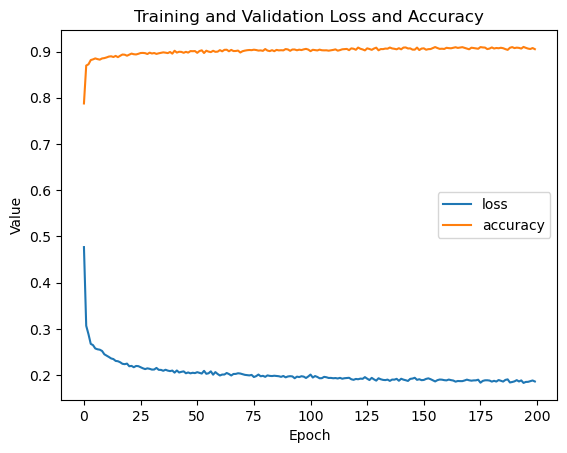

In [91]:
# Plot loss and accuracy graph
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Loss and Accuracy')
plt.legend()
plt.show()


In [92]:
# Predict probabilities for the test set
y_pred_prob = model5.predict(X_test)

# Convert predicted probabilities to binary values (0 or 1) using a threshold
threshold = 0.5
y_pred_binary = (y_pred_prob > threshold).astype("int32").reshape(-1) 

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred_binary)

print("Classification Report:")
print(report)

601/601 [==============================] - 0s 605us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     17525
           1       0.60      0.82      0.70      1701

    accuracy                           0.94     19226
   macro avg       0.79      0.89      0.83     19226
weighted avg       0.95      0.94      0.94     19226



601/601 [==============================] - 0s 605us/step


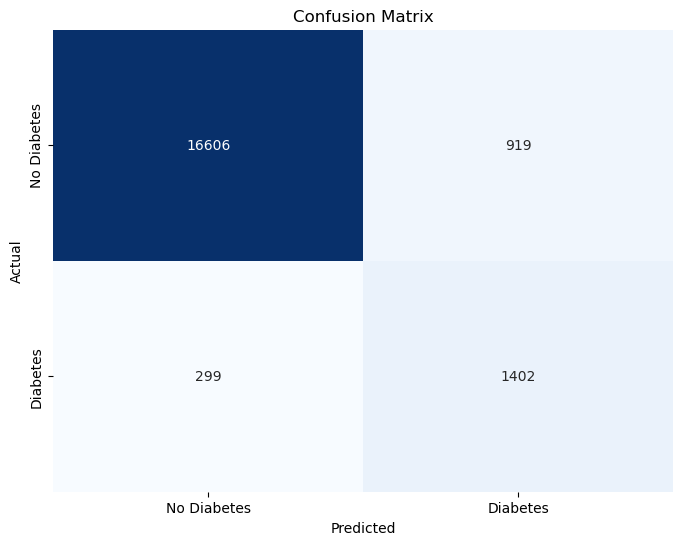

In [93]:
#Confusion Matrix
y_pred = model5.predict(X_test)
y_pred_bool = np.round(y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_bool)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Diabetes', 'Diabetes'],
                yticklabels=['No Diabetes', 'Diabetes'])
    
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


plot_confusion_matrix(cm)